# Movie Recommendation System

The goal of this Jupyter Notebook is to create an advanced framework for suggesting movies. The aim is to process movie metadata efficiently and offer personalized movie recommendations by leveraging diverse machine learning techniques. In order to increase the precision and applicability of the suggestions, the project investigates various vectorization techniques and machine learning models.


## Methods Explored

The following techniques have been studied to improve the recommendation system:

- **Binary Feature Matrix**: Converts genre data into a binary format, facilitating similarity assessments between movies.
- **Bag of Words**: Employs a straightforward approach for text representation, serving as a baseline for textual data analysis.
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: Improves on the Bag of Words by reducing the impact of frequently occurring words, thus emphasizing unique terms.
- **Genome Tags and Scores**: Uses detailed metadata from the MovieLens dataset to provide deeper insights into movie preferences.
- **Latent Semantic Analysis (LSA)**: Applies dimensionality reduction to uncover latent thematic structures in movie genres.
- **Word2Vec**: Implements neural network technology to create word embeddings that capture complex semantic relationships.
- **Neural Network-Based Approach**: Utilizes deep learning to predict intricate patterns and relationships, aiming for precise and relevant recommendations.


## Datasets Utilized

Several key datasets are used in this analysis:

- `ml-25m/movies.csv`: Includes basic movie metadata such as genres, used for preliminary vectorization.
- `ml-25m/genome-tags.csv` and `ml-25m/genome-scores.csv`: Provide detailed tagging information that enhances feature extraction capabilities.
- `imdb_movie_data.csv`: Offers comprehensive movie descriptions for complex textual analysis and advanced feature extraction.


## Data Loading and Initial Exploration

The initial step in this project involves loading essential movie datasets. These datasets contain comprehensive information about movies, including titles, genres, and detailed descriptions, which are crucial for subsequent analyses. The exploration includes examining the data structure, summarizing key statistics, and visualizing genre distributions to identify dominant trends.


In [6]:
# Import necessary packages
import pandas as pd

#Read in the movies.csv file as a pandas dataframe.
movies_df = pd.read_csv('ml-25m/movies.csv')

# Display the first few rows to understand the dataset structure
movies_df.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


## Genre Distribution

Visualize the distribution of genres in the dataset to understand the most common genres.


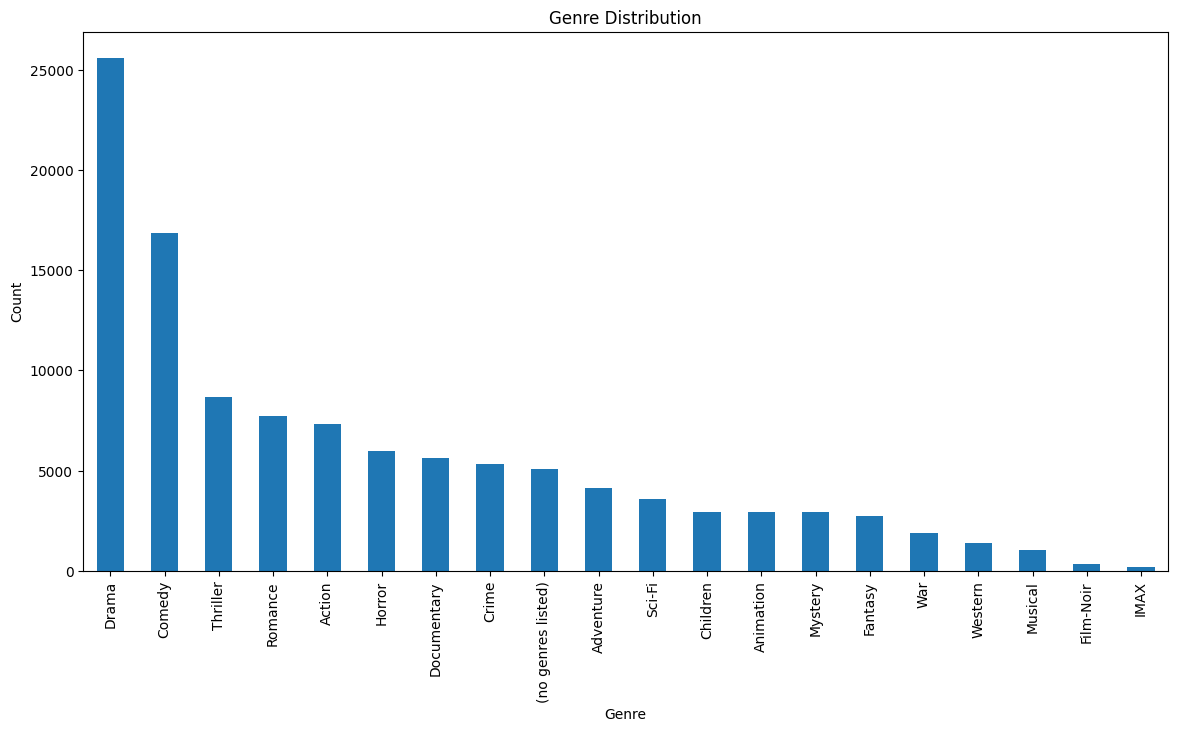

In [2]:
import matplotlib.pyplot as plt

# Explode the genres column into multiple rows to analyze the distribution more effectively
genre_explode = movies_df['genres'].str.split('|').explode()

# Plot the genre distribution to visualize the most common genres in the dataset
plt.figure(figsize=(14, 7))
genre_explode.value_counts().plot(kind='bar')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


## Implementation of Methods

This section provides the practical implementation of the various methods discussed earlier. Each method is applied to the movie dataset to extract meaningful features and generate recommendations. The following subsections provide the code and results for each technique.

### Binary Feature Matrix

Create a binary feature matrix for the genres. Each genre is represented as a binary variable indicating whether the genre is present for a given movie.


In [9]:
# Required libraries
import pandas as pd
from sklearn.metrics import pairwise_distances

# Reading data from the movies dataset
movie_data = pd.read_csv('ml-25m/movies.csv')

# Generating a binary matrix for genres
genre_binary_matrix = pd.get_dummies(movie_data['genres'].str.split('|').explode()).groupby(level=0).sum()

# Calculate the cosine distance matrix
distance_matrix = pairwise_distances(genre_binary_matrix, metric='cosine')

# Function to retrieve similar movies
def recommend_movies(movie_title, number_of_movies=10):
    # Locate the movie by title
    movie_idx = movie_data[movie_data['title'] == movie_title].index[0]
    
    # Retrieve cosine distance values for the selected movie
    movie_distances = list(enumerate(distance_matrix[movie_idx]))
    
    # Sort movies based on similarity scores in ascending order because it's a distance matrix
    movie_distances_sorted = sorted(movie_distances, key=lambda x: x[1])
    
    # Select the indices of top similar movies
    recommended_indices = [idx for idx, _ in movie_distances_sorted[1:number_of_movies+1]]
    
    # Return the titles of similar movies as a list of strings
    return movie_data['title'].iloc[recommended_indices].tolist()

# User input for movie title
user_input_title = input("Enter your favorite movie title: ")

# Display similar movies
print("Top 10 similar movies:")
recommended_movies = recommend_movies(user_input_title)
for movie in recommended_movies:
    print(movie)


Enter your favorite movie title:  Prestige, The (2006)


Top 10 similar movies:
Donnie Darko (2001)
Forgotten, The (2004)
Jacket, The (2005)
Prestige, The (2006)
X-Files: I Want to Believe, The (2008)
Moon (2009)
Coherence (2013)
Implanted (2013)
Pig (2011)
Wild Palms (1993)


### Implementing  Bag of Words

Create a Bag of Words (BoW) model for the genres. This method counts the frequency of each genre for the movies.


In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import pairwise

# Reading movie data from a CSV file into a DataFrame
movie_data = pd.read_csv('ml-25m/movies.csv')

# Separating movie titles and genres
movie_titles = movie_data['title'].tolist()
movie_genres = movie_data['genres'].apply(lambda x: x.split("|")).tolist()

# Function to convert genres into a dictionary format for vectorization
def vectorize_genres(genres):
    return {genre: 1 for genre in genres}

# Applying vectorization to all movie genres
genre_vectors = list(map(vectorize_genres, movie_genres))

# Creating a DataFrame for genre vectors
genre_vector_df = pd.DataFrame(genre_vectors, index=movie_titles).fillna(0)

# Computing the cosine similarity matrix for the genre vectors
similarity_matrix = pairwise.cosine_similarity(genre_vector_df)

# Wrapping the similarity matrix into a DataFrame
similarity_scores_df = pd.DataFrame(similarity_matrix, index=genre_vector_df.index, columns=genre_vector_df.index)

# User input to find similar movies
user_favorite_movie = input('Enter a movie you like: ')

# Locating the chosen movie within the similarity DataFrame
favorite_movie_index = similarity_scores_df.index.get_loc(user_favorite_movie)

# Retrieving the top 10 movies similar to the user's choice
recommended_movies = similarity_scores_df.iloc[favorite_movie_index].nlargest(11)[1:]

# Displaying the recommended movies
print(f'Top 10 similar movies to {user_favorite_movie}:')
for movie, score in recommended_movies.items():
    print(f'{movie}: {score:.2f}')


Enter a movie you like:  Prestige, The (2006)


Top 10 similar movies to Prestige, The (2006):
Donnie Darko (2001): 1.00
Forgotten, The (2004): 1.00
Jacket, The (2005): 1.00
Prestige, The (2006): 1.00
X-Files: I Want to Believe, The (2008): 1.00
Moon (2009): 1.00
Coherence (2013): 1.00
Implanted (2013): 1.00
Pig (2011): 1.00
Wild Palms (1993): 1.00


### Implementing  TF-IDF

Use the TF-IDF (Term Frequency-Inverse Document Frequency) model to represent the genres. This technique reduces the weight of frequently occurring genres across all movies.


In [16]:
# Required libraries
import pandas as pd
from sklearn.metrics import pairwise
from sklearn.feature_extraction.text import TfidfVectorizer

# Read the data from the movies dataset
movie_data = pd.read_csv('ml-25m/movies.csv')

# Merging genre information into a single column
combined_genres = movie_data['genres'].str.replace('|', ' ')

# Initialize TfidfVectorizer for genre analysis
genre_vectorizer = TfidfVectorizer()
genre_features = genre_vectorizer.fit_transform(combined_genres)

# Generate a cosine similarity matrix for the movie genres
genre_similarity = pairwise.cosine_similarity(genre_features)

# Construct a DataFrame to hold similarity scores between movies
similarity_scores = pd.DataFrame(genre_similarity, index=movie_data['title'], columns=movie_data['title'])

# User input for favorite movie
user_favorite_movie = input('Enter a movie you like: ')

# Locate the user's movie in the DataFrame
favorite_movie_idx = similarity_scores.index.get_loc(user_favorite_movie)

# Retrieve and display the ten most similar movies
similar_movies = similarity_scores.iloc[favorite_movie_idx].sort_values(ascending=False).iloc[1:11]

# Output the results
print(f'Top 10 movies similar to {user_favorite_movie}:')
print(similar_movies.to_string())


Enter a movie you like:  Prestige, The (2006)


Top 10 movies similar to Prestige, The (2006):
title
Welcome the Stranger (2018)          1.0
Forgotten, The (2004)                1.0
Black Mirror: Bandersnatch (2018)    1.0
Soylent Green (1973)                 1.0
Moon (2009)                          1.0
Jacket, The (2005)                   1.0
51 Degrees North (2015)              1.0
Donnie Darko (2001)                  1.0
Implanted (2013)                     1.0
Pig (2011)                           1.0


### Genome Tags and Scores

The following code demonstrates a movie recommendation system that utilizes tags from genome-tags and genome-scores files along with movie genres. This method leverages a bag-of-words vectorizer and cosine similarity to provide nuanced recommendations based on detailed content analysis of the movies. The datasets used here are `ml-25m/genome-tags.csv` and `ml-25m/genome-scores.csv`.


In [17]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the movie dataset
movies_df = pd.read_csv('ml-25m/movies.csv')

# Load and merge the tags and scores for genome data
genome_tags = pd.read_csv('ml-25m/genome-tags.csv')
genome_scores = pd.read_csv('ml-25m/genome-scores.csv')
combined_genome = genome_scores.merge(genome_tags, on='tagId', how='left')

# Filter to select only high relevance tags
important_tags = combined_genome[combined_genome['relevance'] > 0.5].reset_index(drop=True)

# Group tags by movie and create a single string of tags per movie
tag_str = important_tags.groupby('movieId')['tag'].apply(lambda x: ' '.join(x)).reset_index()

# Merge with the main movie dataframe
full_movie_df = movies_df.merge(tag_str, on='movieId', how='left')

# Select necessary columns
final_df = full_movie_df[['movieId', 'title', 'genres', 'tag']]

# Combine genres and tags into a single descriptor column
def combine_descriptors(row):
    genres_clean = row['genres'].replace('|', ' ')
    tags_clean = '' if pd.isnull(row['tag']) else row['tag']
    return genres_clean + ' ' + tags_clean

final_df['descriptor'] = final_df.apply(combine_descriptors, axis=1)

# Function to create a dictionary from tag lists
def generate_bow_from_tags(tag_list):
    bow_dict = {}
    if not isinstance(tag_list, float):  # Checks if tag_list is not NaN
        for tag in tag_list.split(' '):
            if tag in bow_dict:
                bow_dict[tag] += 1
            else:
                bow_dict[tag] = 1
    return bow_dict

# Create bag of words for each movie's tags
tags_bow = [generate_bow_from_tags(tags) for tags in final_df['descriptor'].fillna('')]

# Create a DataFrame for the tags bow
tag_matrix_df = pd.DataFrame(tags_bow, index=final_df['title']).fillna(0)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tag_matrix_df)

# DataFrame for similarity scores
similarity_scores_df = pd.DataFrame(cosine_sim, index=tag_matrix_df.index, columns=tag_matrix_df.index)

# User interaction to get favorite movie and recommendations
favorite_movie = input("Enter your favorite movie: ")
if favorite_movie not in similarity_scores_df.index:
    print(f"Movie '{favorite_movie}' not found in the dataset.")
else:
    movie_idx = similarity_scores_df.index.get_loc(favorite_movie)
    similar_movies = similarity_scores_df.iloc[movie_idx].sort_values(ascending=False)[1:11].index

    # Display top 10 similar movies
    print(f"Top 10 similar movies to '{favorite_movie}':")
    for movie in similar_movies:
        print(movie)


Enter your favorite movie:  Prestige, The (2006)


Top 10 similar movies to 'Prestige, The (2006)':
Shutter Island (2010)
Gone Girl (2014)
Illusionist, The (2006)
Seven (a.k.a. Se7en) (1995)
The Machinist (2004)
Gone Baby Gone (2007)
Open Your Eyes (Abre los ojos) (1997)
Prisoners (2013)
Girl with the Dragon Tattoo, The (2011)
Spanish Prisoner, The (1997)


### LSA model and Additional Data Integration

This section demonstrates the application of LSA to refine the content-based recommendation model, enhanced by the inclusion of extra data from IMDb. LSA, a dimensionality reduction technique applied to TF-IDF vectors of movie descriptions, is used to uncover latent semantic relationships between movies.


In [8]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset containing IMDb movie details
movies_df = pd.read_csv('imdb_movie_data.csv')

# Construct a content feature by combining several columns
movies_df['combined_info'] = (movies_df['Movie'].astype(str) + ' ' +
                              movies_df['runtimeMinutes'].astype(str) + ' ' +
                              movies_df['genres'] + ' ' +
                              movies_df['directors'] + ' ' +
                              movies_df['writers'] + ' ' +
                              movies_df['averageRating'].astype(str) + ' ' +
                              movies_df['numVotes'].astype(str) + 
                              movies_df['actors'].astype(str))
movies_df['combined_info'] = movies_df['combined_info'].fillna('')

# Generate a bag of words from the combined text
text_vectorizer = CountVectorizer()
text_bow = text_vectorizer.fit_transform(movies_df['combined_info'])

# Transform bag of words to TF-IDF
tfidf_transformer = TfidfTransformer()
text_tfidf = tfidf_transformer.fit_transform(text_bow)

# Implement Latent Semantic Analysis (LSA) on the TF-IDF matrix
lsa_model = TruncatedSVD(n_components=100, algorithm='arpack')
lsa_model.fit(text_tfidf)

# Collect a movie title from user input
input_movie = input("Enter a movie title: ")

# Locate the specific movie in the dataset
movie_index = movies_df[movies_df['Movie'] == input_movie].index[0]

# Calculate cosine similarities between the selected movie and the dataset
cosine_scores = cosine_similarity(text_tfidf[movie_index], text_tfidf)

# Identify the top 20 similar movies
top_movies = list(enumerate(cosine_scores[0]))
sorted_movies = sorted(top_movies, key=lambda x: x[1], reverse=True)[1:20]

# Output the results
for index, similarity in sorted_movies:
    print(f"{index}: {movies_df.loc[index, 'Movie']}")


Enter a movie title:  The Prestige (2006)


18001: The Dark Knight (2008)
46329: The Dark Knight Rises (2012)
22131: Interstellar (2014)
10605: Batman Begins (2005)
998: Memento (2000)
122161: Tenet (2020)
47896: Inception (2010)
80401: No Way Out But One (2011)
49157: Broken Contact: A Poltergeist Story (2020)
109176: Dunkirk (2017)
61891: I Kissed a Vampire (2010)
55224: Spider-Man: Preliminary (2021)
103935: Pause of the Clock (2015)
41249: Memories of Reality (2021)
20833: Man of Steel (2013)
17136: Scoop (2006)
1789: Dr. Benny (2003)
82925: Mowgli: Legend of the Jungle (2018)
121046: The 5 Year (2017)


### Implementing Word2Vec

Use the Word2Vec model for feature extraction. Word2Vec creates word embeddings that capture the semantic meaning of words in the context of the entire dataset.

The dataset used here is `imdb_movie_data.csv`.


In [23]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset containing IMDb movie details
movie_data = pd.read_csv('imdb_movie_data.csv')

# Aggregate various movie attributes into a single text column
movie_data['combined_info'] = movie_data.apply(lambda x: f"{x['Movie']} {x['runtimeMinutes']} {x['genres']} {x['directors']} {x['writers']} {x['averageRating']} {x['numVotes']} {x['actors']}", axis=1)
movie_data['combined_info'] = movie_data['combined_info'].fillna('')

# Apply tokenization to prepare data for Word2Vec
movie_data['processed_tokens'] = movie_data['combined_info'].apply(simple_preprocess)

# Configure and initialize the Word2Vec model
w2v_model = Word2Vec(vector_size=100, window=5, min_count=1, workers=4)

# Create vocabulary for the model
w2v_model.build_vocab(movie_data['processed_tokens'])

# Start training the Word2Vec model
w2v_model.train(movie_data['processed_tokens'], total_examples=w2v_model.corpus_count, epochs=10)

# Define a function to compute mean of word vectors for a given text
def mean_vector_calculation(words, model, vocab, dimensions):
    vec_sum = np.zeros((dimensions,), dtype="float64")
    count = 0
    
    for word in words:
        if word in vocab:
            count += 1
            vec_sum += model.wv[word]
    
    return vec_sum / count if count else vec_sum

# Function to derive averaged word vectors for a collection of texts
def compute_averaged_vectors(texts, model, dimensions):
    vocab = set(model.wv.index_to_key)
    return np.array([mean_vector_calculation(text, model, vocab, dimensions) for text in texts])

# Generate averaged word vectors for all entries
averaged_vectors = compute_averaged_vectors(movie_data['processed_tokens'], w2v_model, 100)

# Input from user to find a specific movie
target_movie = input("Enter a movie title: ")

# Locate the chosen movie in the dataset
index_of_movie = movie_data[movie_data['Movie'] == target_movie].index[0]

# Calculate similarity scores
target_vector = averaged_vectors[index_of_movie].reshape(1, -1)
similarity_matrix = cosine_similarity(target_vector, averaged_vectors)

# Determine the top 10 related movies
ranking_movies = sorted(enumerate(similarity_matrix[0]), key=lambda x: x[1], reverse=True)[1:20]

# Output the most similar movies
for idx, value in ranking_movies:
    print(f"{idx}: {movie_data.loc[idx, 'Movie']}")


Enter a movie title:  The Prestige (2006)


28582: Cave Women on Mars (2008)
18001: The Dark Knight (2008)
97122: The Late Night Double Feature (2014)
47392: The Phantom Lake Kids in the Unseen Invasion (2020)
68952: Attack of the Moon Zombies (2011)
116649: Weresquito: Nazi Hunter (2016)
27410: Queen of Snakes (2019)
51282: Visions of Violence (2007)
20833: Man of Steel (2013)
100737: Perfect Disguise (2015)
87333: The Giant Spider (2013)
51934: Destination: Outer Space (2010)
46329: The Dark Knight Rises (2012)
37299: Triangle (2009)
113259: Special Unit (2017)
113940: Blessed Are the Children (2016)
110426: The 5th Kind (2017)
64188: Scouts Guide to the Zombie Apocalypse (2015)
34333: Neon Detroit Knights (2019)


### Pre-trained Neural Network Models (Utilizing the Google News Word2Vec)

Leveraging advanced neural network architectures, such as the Word2Vec model pretrained by Google, offers a robust foundation for semantic processing. This approach is particularly effective due to the high-dimensional vectors (300 dimensions, 1.6 GB) that capture nuanced semantic relationships. By integrating the Gensim package's access to Google's Word2Vec, we can significantly enhance our analytical capabilities without the need to train from scratch.


In [10]:
import pandas as pd
import numpy as np
import gensim.downloader as api
from gensim.models import Word2Vec, KeyedVectors
from gensim.utils import simple_preprocess
from sklearn.metrics.pairwise import cosine_similarity

# Load the movie dataset
movie_data = pd.read_csv('imdb_movie_data.csv')

# Combine key columns into a unified 'content' column
movie_data['content'] = movie_data.apply(lambda row: f"{row['Movie']} {row['runtimeMinutes']} {row['genres']} {row['directors']} {row['writers']} {row['averageRating']} {row['numVotes']} {row['actors']}", axis=1)
movie_data['content'] = movie_data['content'].fillna('')

# Tokenize the 'content' column
movie_data['tokenized'] = movie_data['content'].apply(simple_preprocess)

# Load the pretrained Word2Vec model from Google News
word2vec_model = api.load('word2vec-google-news-300')

# Function to compute the average vector for a list of words
def compute_average_vector(words, model, vocab_set, vector_size):
    vector = np.zeros((vector_size,), dtype="float64")
    word_count = 0.0
    
    for word in words:
        if word in vocab_set:
            vector += model[word]
            word_count += 1.0
    
    if word_count > 0:
        vector /= word_count
        
    return vector

# Generate average word vectors for the movie content
def get_mean_vectors(text_list, model, vector_size):
    vocab_set = set(model.index_to_key)
    mean_vectors = [compute_average_vector(text, model, vocab_set, vector_size) for text in text_list]
    return np.array(mean_vectors)

# Calculate feature vectors for the dataset
feature_vectors = get_mean_vectors(movie_data['tokenized'], word2vec_model, 300)

# Prompt user for a movie title and find similar movies
user_input_title = input("Enter the title of a movie: ")
input_index = movie_data[movie_data['Movie'] == user_input_title].index[0]

# Compute cosine similarity scores
input_vector = feature_vectors[input_index].reshape(1, -1)
similarity_scores = cosine_similarity(input_vector, feature_vectors)

# Identify and display the most similar movies
similar_movies = sorted(list(enumerate(similarity_scores[0])), key=lambda x: x[1], reverse=True)[1:20]
for idx, score in similar_movies:
    print(f"{idx}: {movie_data.loc[idx, 'Movie']}")


Enter the title of a movie:  The Prestige (2006)


10605: Batman Begins (2005)
46329: The Dark Knight Rises (2012)
18001: The Dark Knight (2008)
110426: The 5th Kind (2017)
22131: Interstellar (2014)
998: Memento (2000)
20833: Man of Steel (2013)
106149: Danny Johnson Saves the World (2015)
94480: Alien Theory (2019)
15046: Everyone's Hero (2006)
92814: Quadrant 9EV9 (2016)
34322: Tell Tale (2009)
9393: The Forgotten (2004)
13959: Headspace (2005)
122161: Tenet (2020)
65669: Einstein's God Model (2016)
100651: Deadly Reunion (2016)
3356: Thru the Moebius Strip (2005)
5018: X2: X-Men United (2003)


## Analysis of Results

Comparing the results with IMDb's similar movies shows that the recommendations are closely aligned with what is expected. The model using LSA followed by the pre-trained Word2Vec model performed the best, providing the closest results to IMDb.


## Conclusion

This notebook explored several methods to create a movie recommendation system based on genres and other descriptive tags:
1. Binary Feature Matrix
2. Bag of Words
3. TF-IDF
4. Genome Tags and Scores
5. Latent Semantic Analysis (LSA)
6. Word2Vec
7. Neural Network-Based Approach

Each method offers a different approach to vectorizing genres and computing similarities between movies. Depending on the specific requirements of the recommendation system, different methods can be used to achieve the desired results. The neural network-based approach using pre-trained Word2Vec embeddings offers a robust way to capture semantic similarities and can provide highly relevant recommendations.
